<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Packages" data-toc-modified-id="Import-Packages-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import Packages</a></span></li><li><span><a href="#Read-Data" data-toc-modified-id="Read-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Read Data</a></span><ul class="toc-item"><li><span><a href="#Player-Performance" data-toc-modified-id="Player-Performance-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Player Performance</a></span></li><li><span><a href="#Team" data-toc-modified-id="Team-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Team</a></span></li><li><span><a href="#Fixtures" data-toc-modified-id="Fixtures-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Fixtures</a></span></li><li><span><a href="#Players" data-toc-modified-id="Players-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Players</a></span></li></ul></li><li><span><a href="#Feature-Development" data-toc-modified-id="Feature-Development-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Feature Development</a></span><ul class="toc-item"><li><span><a href="#Team" data-toc-modified-id="Team-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Team</a></span></li><li><span><a href="#Player-Position" data-toc-modified-id="Player-Position-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Player Position</a></span></li><li><span><a href="#Form" data-toc-modified-id="Form-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Form</a></span></li></ul></li></ul></div>

# Developing Features

This script will outline the different processing of developing different features.

## Import Packages

Self explanitory.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.preprocessing

# Pandas Settings
pd.set_option('display.max_columns', None)

## Read Data

Read player performance, team, fixtures and player data.

### Player Performance

In [2]:
pp = pd.read_csv('../../data/csv/player_performance.csv')
pp = pp.sort_values(by=["id", "kickoff_time"])
pp.head()

,kickoff_time,team_h_score,team_a_score,was_home,round,total_points,value,transfers_balance,selected,transfers_in,transfers_out,loaned_in,loaned_out,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,ea_index,open_play_crosses,big_chances_created,clearances_blocks_interceptions,recoveries,key_passes,tackles,winning_goals,attempted_passes,completed_passes,penalties_conceded,big_chances_missed,errors_leading_to_goal,errors_leading_to_goal_attempt,tackled,offside,target_missed,fouls,dribbles,id,fixture,opponent_team
0,2018-08-12 15:00:00+00:00,0,2,True,1,3,50,0,70767,0,0,0,0,90,0,0,0,2,0,0,0,0,0,6,0,24,47.0,0.0,0.0,4.7,0,0,0,2,9,0,0,0,42,31,0,0,0,0,0,0,0,0,0,0,0,12
1,2018-08-18 16:30:00+00:00,3,2,False,2,3,50,188,90038,6059,5871,0,0,90,0,0,0,3,0,0,0,0,0,8,0,26,53.0,0.0,0.0,5.3,0,0,0,1,8,0,0,0,35,25,0,0,0,0,0,0,0,0,0,0,13,5
2,2018-08-25 14:00:00+00:00,3,1,True,3,3,50,8540,107301,19550,11010,0,0,90,0,0,0,1,0,0,0,0,0,4,0,17,27.8,0.0,0.0,2.8,0,0,0,0,10,0,0,0,24,20,0,0,0,0,0,0,0,0,0,0,20,18
3,2018-09-02 12:30:00+00:00,2,3,False,4,1,50,9582,123566,19332,9750,0,0,90,0,0,0,2,0,0,0,0,0,1,0,8,2.4,0.0,0.0,0.2,0,0,0,0,8,0,0,0,38,24,0,0,0,2,0,0,0,0,0,0,32,4
4,2018-09-15 14:00:00+00:00,1,2,False,5,2,50,-3297,123310,8837,12134,0,0,90,0,0,0,1,0,0,0,0,0,1,0,13,14.2,0.0,0.0,1.4,0,0,0,2,13,0,0,0,33,23,0,0,0,0,0,0,0,0,0,0,45,14


### Team

In [3]:
teams = pd.read_csv('../../data/csv/teams.csv')
teams.head()

,id,name,short_name,strength,strength_defence_home,strength_attack_home,strength_overall_home,strength_defence_away,strength_attack_away,strength_overall_away
0,0,Arsenal,ARS,4,1310,1240,1260,1340,1270,1320
1,1,Bournemouth,BOU,3,1120,1040,1030,1130,1100,1130
2,2,Brighton,BHA,2,1010,1040,1030,1070,1140,1050
3,3,Burnley,BUR,3,1000,990,1070,1040,1030,1100
4,4,Cardiff,CAR,2,1020,1030,1030,1090,1060,1080


### Fixtures

In [4]:
fixtures = pd.read_csv('../../data/csv/fixtures.csv')
fixtures.head()

,id,kickoff_time,team_h,team_a,team_h_score,team_a_score,team_h_difficulty,team_a_difficulty
0,0,2018-08-12T15:00:00Z,0,12,0,2,4,4
1,1,2018-08-11T14:00:00Z,1,4,2,0,2,3
2,2,2018-08-11T14:00:00Z,8,6,0,2,2,2
3,3,2018-08-11T14:00:00Z,9,5,0,3,4,2
4,4,2018-08-12T12:30:00Z,11,18,4,0,3,5


### Players

In [5]:
players = pd.read_csv('../../data/csv/players.csv')
players.head()

,id,first_name,second_name,display_name,position
0,0,Petr,Cech,Cech,0
1,1,Bernd,Leno,Leno,0
2,2,Laurent,Koscielny,Koscielny,1
3,3,Héctor,Bellerín,Bellerín,1
4,4,Nacho,Monreal,Monreal,1


## Feature Development

Each subsection calculates a different feature. Look under subheading for definitions.

Start by creating a blank DataFrame, and copying only a few key features. This will be the DataFrame that new features get added to.

In [6]:
dataset = pd.DataFrame()
columns_to_copy = ["was_home", "total_points"]
dataset[columns_to_copy] = pp[columns_to_copy]
dataset.head()

,was_home,total_points
0,True,3
1,False,3
2,True,3
3,False,1
4,False,2


### Team

This will add the player's team id as a new column. This needs to be identified through the fixtures DataFrame rather than the players DataFrame.

In [7]:
# Empty array to store team data
team = np.zeros(len(pp), dtype="int")

# Loop thorugh player performances
for i in range(len(pp)):

    # extract id of fixture of interest
    current_fixture = pp.loc[i, "fixture"]

    # extract home team id if player was at home, extract away team id if player was away.
    if pp.loc[i, "was_home"]:
        team[i] = fixtures.loc[current_fixture, "team_h"]
    else:
        team[i] = fixtures.loc[current_fixture, "team_a"]

# Add to dataset
dataset["team"] = pd.Series(team)
dataset.head()

,was_home,total_points,team
0,True,3,0
1,False,3,0
2,True,3,0
3,False,1,0
4,False,2,0


### Player Position

This will add a column filled with values 0, 1, 2 and 3. Each describes a different position:
- 0 = Goalkeeper
- 1 = Defender
- 2 = Midfileder
- 3 = Forward

This will then be converted using One Hot Encoding.

In [8]:
# Add position category value
dataset["position"] = players.loc[np.array(pp["id"]), "position"].reset_index(
    drop=True)

In [9]:
# One Hot Encode
onehotencoder = sklearn.preprocessing.OneHotEncoder(sparse=False,
                                                    categories="auto")
position_ohe = onehotencoder.fit_transform(dataset["position"].values.reshape(
    len(pp), 1))
dataset[["GKP", "DEF", "MID", "FWD"]] = pd.DataFrame(position_ohe == 1)

In [10]:
# Drop position ordinal value
dataset = dataset.drop(columns=["position"])
dataset.head()

,was_home,total_points,team,GKP,DEF,MID,FWD
0,True,3,0,True,False,False,False
1,False,3,0,True,False,False,False
2,True,3,0,True,False,False,False
3,False,1,0,True,False,False,False
4,False,2,0,True,False,False,False


### Form

Calculates average from previous games.
- total points
- minutes

In [11]:
# normpdf function
import math
def normpdf(x, mu, sigma):
    if np.isinf(sigma):
        return np.ones(len(x), dtype="float")*(1/len(x))
    else:
        return (1/np.sqrt(2*math.pi*(sigma**2)))*np.exp(-((x-mu)**2)/(2*(sigma**2)))

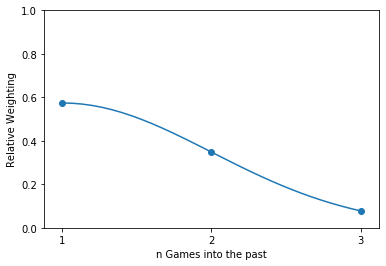

In [18]:
# Response Function
nPreviousGames = 3
sigma = 1

# games array
games = np.array(range(1,nPreviousGames+1))
games_fill = np.linspace(1,nPreviousGames,(nPreviousGames*10)+1)

# response array
response = normpdf(games, 1, sigma)
response_fill = normpdf(games_fill, 1, sigma)

norm_response = response/np.sum(response)
norm_response_fill = response_fill*(np.max(norm_response)/np.max(response_fill))


# plot
plt.plot(games_fill, norm_response_fill);
plt.scatter(games, norm_response);
plt.ylim(0,1);
plt.xticks(games);
plt.xlabel('n Games into the past');
plt.ylabel('Relative Weighting');

In [ ]:

form_on_columns = ["total_points", "minutes"]

